In [83]:
import pandas as pd


In [84]:
df = pd.read_csv('inclass-data/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss','hpw','native country','income']
df.head()

,age,workclass,fnlwgt,edu,edu-num,marital,occupation,relationship,race,sex,cap-gain,cap-loss,hpw,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Drop useless features (columns)

In [85]:
df = df.drop(columns=['fnlwgt', 'edu', 'cap-gain', 'cap-loss', 'native country','marital'])

In [86]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [87]:
df.head()

,age,workclass,edu-num,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,<=50K


In [88]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [89]:
# remove the ? from the all column
for i in df.columns:
    dfi_nc = df[df[i] == ' ?'].index
    df = df.drop(labels=dfi_nc)

In [90]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [91]:
df['income'].value_counts()

 <=50K    23068
 >50K      7650
Name: income, dtype: int64

In [92]:
import numpy as np
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

numeric_features = ["age", "edu-num", "hpw"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["workclass", "marital", "occupation","relationship","race"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [93]:
df.head()

,age,workclass,edu-num,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Prof-specialty,Wife,Black,Female,40,<=50K


In [94]:

x = df.iloc[:,:-1]    #Split only data
y = df.iloc[:,-1]     #Split the target out

min_max_scaler = preprocessing.MinMaxScaler()
xdf = min_max_scaler.fit_transform(x_new)
colname = min_max_scaler.get_feature_names_out()
xdf= pd.DataFrame(xdf, columns=colname)
xdf.head()

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.1,random_state = 0)

In [96]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (27646, 42)
y_train shape (27646,)
X_test shape (3072, 42)
y_test shape (3072,)


In [97]:
#Build logistic regression model
clf = LogisticRegression()
clf.fit(x_train,y_train)
# = theta0 + theta1*x _theta2*y
print("Theta0: ",clf.intercept_[0])
print("Theta1: ",clf.coef_[0][0])
print("Theta2: ",clf.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(clf.intercept_[0],clf.coef_[0][0],clf.coef_[0][1]))

Theta0:  -2.5598407240290815
Theta1:  0.39419841193162203
Theta2:  0.7557188228438952
0 = -2.5598+0.3942x+0.7557y


/home/azthorax/anaconda3/envs/fra501_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
y_pred = clf.predict(x_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     20767
        >50K       0.70      0.56      0.62      6879

    accuracy                           0.83     27646
   macro avg       0.78      0.74      0.76     27646
weighted avg       0.82      0.83      0.82     27646

Confusion matrix 
[[19105  1662]
 [ 3025  3854]]


c:\program files\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


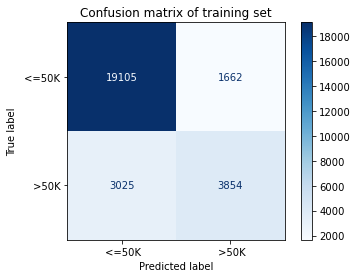

In [99]:
# Plot confusion matrix of training set
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [100]:
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.829
